# Data Analysis on Heart Disease Patient Data

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import seaborn as sns

import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
import seaborn as sns; sns.set()  # for plot styling
from sklearn.metrics import confusion_matrix, accuracy_score

%matplotlib inline

## 1. Import data and summarise

In [2]:
df = pd.read_csv('winequality-white.csv', delimiter=";")
df.head()

In [ ]:
df['quality'].describe()

### 1.1 Distribution of Quality

In [ ]:
sns.histplot(df['quality'])

#skewness and kurtosis
print("Skewness: %f" % df['quality'].skew())
print("Kurtosis: %f" % df['quality'].kurt())


In [ ]:
# Visualising quality
temp = df['quality'].value_counts()
dfviz = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

#df.plot(kind='pie',labels='labels',values='values', title='Activity Ditribution',subplots= "True")

labels = dfviz['labels']
sizes = dfviz['values']
colors = ['orange', 'yellow', 'lightpink', 'lightcoral','cyan','lightskyblue', 'red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

### 1.2. Check for missing data
And delete it as appropiate.

In [ ]:
# missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

In [ ]:
# FOR FUTURE REFERENCE:
#total = df_train.isnull().sum().sort_values(ascending=False)
#percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
#missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#missing_data.head(20)

## 2. Visualise relation between features and target variable (quality)

In [3]:
#scatter plot grlivarea/saleprice
attributes = ['pH', 'citric acid', 'sulphates', 'alcohol', 'residual sugar', 'chlorides', 'total sulfur dioxide']
for var in attributes:
    data = pd.concat([df['quality'], df[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x="quality", y=var, data=data)



### 2.1. Correlation matrix with heatmap

A few conclusions from this correlation matrix:
- Quality seems to only be directly correlated with alcohol.
- However, alcohol seems to be negatively correlated with density and residual sugar (and total sulfur dioxide a bit maybe).
- If we keep going, residual sugar seems to not be correlated with anything else other than with density (and total & free sulfur dioxide maybe, but perhaps at the same level as alcohol did).
- Looking at pH, citric acid and volatile acidity, they don't seem to be correlated with anything else at all. Would be interesting to do a classification with reduced features and another with a more ample array of features.

### 2.2. Correlation with top 10 features and Quality

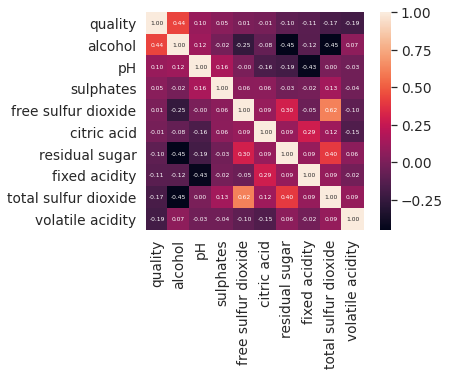

In [ ]:
# Zoomed into quality
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'quality')['quality'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 6}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### 2.3. Scatter plots across some of the higher correlated features

In [ ]:
#scatterplot
sns.set()
cols = ['quality', 'alcohol', 'residual sugar', 'density', 'total sulfur dioxide', 'chlorides']
sns.pairplot(df[cols], size = 2.5)
plt.show();

## 3. Train and Run Model

In [7]:
# Separate X and y variables
y = df['quality']
X = df.drop(['quality'], axis = 1, inplace = False)
X_norm = (X-X.mean())/X.std()
X_norm.head()

# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size= 0.4)


##### 3.1 SVM Classifier

In [40]:
# training a linear SVM classifier 
svm_model_linear = svm.SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
score = svm_model_linear.score(X_test, y_test) 
print("Score is: ", score)

# accuracy score: 
print("Accuracy score: ", accuracy_score(y_test,svm_predictions) )

# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions)
cm



0.5071428571428571


array([[  0,   0,   3,   6,   0,   0,   0],
       [  0,   0,  44,  22,   0,   0,   0],
       [  0,   0, 305, 273,   0,   0,   0],
       [  0,   0, 192, 689,   0,   0,   0],
       [  0,   0,  23, 323,   0,   0,   0],
       [  0,   0,   0,  76,   0,   0,   0],
       [  0,   0,   0,   4,   0,   0,   0]])

#### 3.2 Decision Tree Classifier

In [18]:
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions)
cm

array([[  0,   0,   6,   5,   1,   0,   0],
       [  0,   0,  43,  20,   2,   0,   0],
       [  0,   0, 391, 164,   4,   0,   0],
       [  0,   0, 293, 542,  52,   0,   0],
       [  0,   0,  37, 242,  74,   0,   0],
       [  0,   0,   4,  51,  25,   0,   0],
       [  0,   0,   1,   2,   1,   0,   0]])

In [31]:
accuracy_score(y_test,dtree_predictions)

0.3862244897959184

#### 3.3 K-Neighbours Classifier

In [41]:
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
  
# score on X_test 
score = knn.score(X_test, y_test) 
print("Knn score", score )
  
# accuracy score
print("Accuracy score: ", accuracy_score(y_test,knn_predictions) )

# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 
cm

0.5193877551020408
Accuracy score:  0.3433673469387755


array([[  0,   0,   4,   5,   0,   0,   0],
       [  0,   4,  40,  20,   1,   1,   0],
       [  0,  14, 349, 194,  20,   1,   0],
       [  0,   2, 245, 523, 107,   4,   0],
       [  0,   0,  24, 180, 138,   4,   0],
       [  0,   0,   6,  21,  45,   4,   0],
       [  0,   0,   0,   0,   4,   0,   0]])

##### 3.4 Naives Bayes Classifier

In [38]:
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# score on X_test 
score = gnb.score(X_test, y_test) 
print("Score: ", score) 
  
# accuracy score
print("Accuracy score: ", accuracy_score(y_test,gnb_predictions))

# creating a confusion matrix 
cm = confusion_matrix(y_test, gnb_predictions) 
cm


Score:  0.4377551020408163
Accuracy score:  0.4377551020408163


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=18cf4704-3790-49a3-8d94-41dc8f485b71' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>